**Шаг 1**

*Запустите первую ячейку. Введите требуемую информацию*

In [11]:
from methods import get_method, __send_request__
methods = ["vacancies"]
import json
from datetime import datetime
from time import sleep
from preprocessing import start_prprocessing

if __name__ == "__main__":
    # for method in methods:
    #     get_method(endpoint=method)
    text = input("""____
Введите запрос для поиска вакансии
Например: Java backend разработчик
____
""")
    experience_list = [
      {
         "id": "noExperience",
         "name": "Нет опыта"
      },
      {
         "id": "between1And3",
         "name": "От 1 года до 3 лет"
      },
      {
         "id": "between3And6",
         "name": "От 3 до 6 лет"
      },
      {
         "id": "moreThan6",
         "name": "Более 6 лет"
      }
   ]
    experience = int(input("""____
Введите опыт работы:
0 - Нет опыта
1 - От 1 года до 3 лет
2 - От 3 до 6 лет
3 - Более 6 лет
____
"""))
    while not str(experience) in ['0','1','2','3']:
        print("""
----!!!Опыт работы должен быть указан целым числом от 0 до 3 включительно----""")
        experience = int(input("""____
Введите опыт работы:
0 - Нет опыта
1 - От 1 года до 3 лет
2 - От 3 до 6 лет
3 - Более 6 лет
____
"""))
    now = datetime.now().strftime('%dT%H%M')
    with open('jsons/'+methods[0]+'.json', 'w', encoding='utf8') as file:
        page = 0
        params_vacancies = {
            "experience": experience_list[experience]["id"],
            "professional_role": 96,
            "page": page,
            "per_page": 100,
            "employment": "full",
            "schedule": "fullDay",
            "vacancy_search_fields": "name",
            "gender": "male",
            "education_level": "higher",
            "text": text,
            "area": "113",
            # "only_with_salary": True,
            # "period": 30,
            "premium": False
                }
        response_json = __send_request__(endpoint=methods[0], params=params_vacancies)
        for page in range(1, 19):
#             print(f"page = {page}")
            # sleep(3)
            params_vacancies = {
                "experience": experience_list[experience]["id"],
                "professional_role": 96,
                "page": page,
                "per_page": 100,
                "employment": "full",
                "schedule": "fullDay",
                "vacancy_search_fields": "name",
                "gender": "male",
                "education_level": "higher",
                "text": text,
                "area": "113",
                # "only_with_salary": True,
                # "period": 30,
                "premium": False
                    }
            response_json["items"] += __send_request__(endpoint=methods[0], params=params_vacancies)["items"]
        json.dump(response_json, file, ensure_ascii=False, indent=3)

    print("""_____
Данные из хх ру загружены.
_____
""")


____
Введите запрос для поиска вакансии
Например: Java backend разработчик
____

____
Введите опыт работы:
0 - Нет опыта
1 - От 1 года до 3 лет
2 - От 3 до 6 лет
3 - Более 6 лет
____
1
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
Response status = 200
_____
Данные из хх ру загружены.
_____



**Шаг2**

*Запустите следующую ячейку

In [12]:
import pandas as pd
with open('jsons/vacancies.json', encoding='utf-8') as inputfile:
    myfile = pd.read_json(inputfile)

#из json забираем словарь, в котором находятся информативные поля
mydict = []
for i in range(len(myfile['items'])):
    mydict.append(myfile['items'][i])
    # print (mydict)

#далее идут блоки, где мы из словаря формируем столбцы датафрейма

name = []
salaryfr = []
salaryto = []
salarycur = []
area = []
publish = []
employer = []
prole = []
exp = []
count = len(mydict)
for i in range(count):
#     print(f"{i} from {count}")
    name.append(mydict[i]['name'])
    try: 
        salaryfr.append(mydict[i]['salary']['from'])
    except: 
        salaryfr.append('0')
    try: 
        salaryto.append(mydict[i]['salary']['to'])
    except: 
        salaryto.append('0')
    try: 
        salarycur.append(mydict[i]['salary']['currency'])
    except: 
        salarycur.append('0')
    area.append(mydict[i]['area']['name'])
    publish.append(mydict[i]['published_at'])
    employer.append(mydict[i]['employer']['name'])
    prole.append(mydict[i]['professional_roles'][0]['name'])
    exp.append(mydict[i]['experience']['name'])

#собираем датафрейм, транспонируя списки с данными из hh api. Задаем имена столбцов
data = []
data.append(name)
data.append(salaryfr)
data.append(salaryto)
data.append(salarycur)
data.append(area)
data.append(publish)
data.append(employer)
data.append(prole)
data.append(exp)
df = pd.DataFrame(data).transpose()
df.columns = ['вакансия', 'зарплата от', 'зарплата до', 'Валюта', 'Локация', 'Опубликовано', 'Работодатель', 'Роль', 'Опыт']
# df

#дропаем строки с пустой зарплатой, заполняем зп, если указана одна сторона вилки, приводим в порядок дату, делаем нормальный индекс 
#добавляем среднюю зп
df['зарплата от'].fillna('0', inplace=True)
df = df.drop(df[df['зарплата от'] == '0'].index)
df['зарплата до'].fillna(df['зарплата от'], inplace=True)
df['Опубликовано']=pd.to_datetime(df['Опубликовано']).dt.date
df.reset_index(drop=True, inplace=True)
df['средняя'] = (df['зарплата от']+df['зарплата до'])/2

#сохраняем файл
df.to_csv('csv/clean_vac.csv', sep='\t', encoding='utf-8')

import seaborn as sns
import matplotlib.pyplot as plt
size = df.shape[0]

# plt.barh(df['Локация'], df['средняя'])
print('Обработка завершена. Данные очищены')


Обработка завершена. Данные очищены


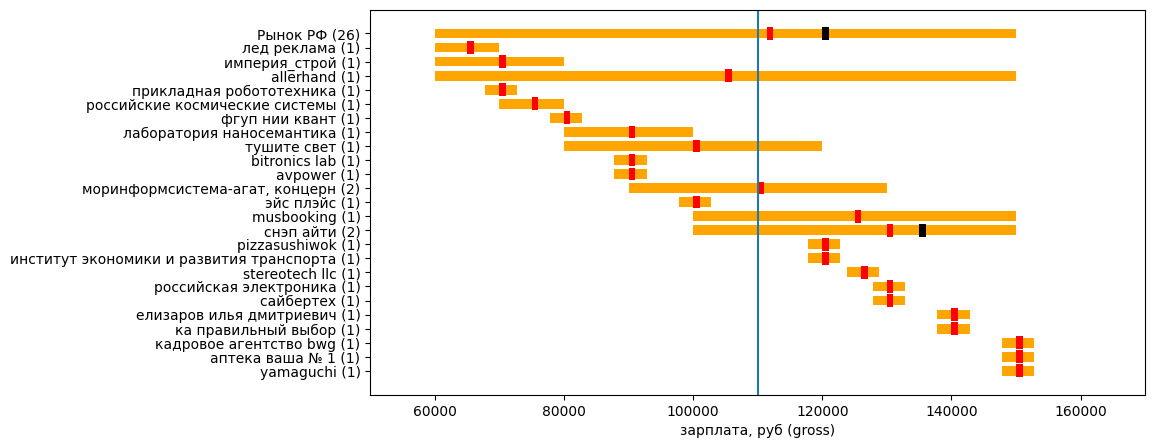

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('csv/clean_vac.csv', sep = '\t')

employers = set(df['Работодатель'])
for company in employers:
    num_of_vacancies = int(len(df[df['Работодатель'] == company]))
#     df[df['Работодатель'] == company]
    index_list = df[df['Работодатель'] == company].index
    df.loc[index_list, 'количество вакансий'] = num_of_vacancies

#filters
key_words = 'разработчик, sql'
key_vac_name = True
key_requarements = False
key_responsibility = False
min_num_vacans = 1
from_data = '2020-05-20'
to_data = '2024-05-20'
location = 'москва'
with_zp = True
from_zp_rub = 60000
to_zp_rub = 150000
experience = 'От 1 года до 3 лет'

df['вакансия'] = df['вакансия'].str.lower()
df['Роль'] = df['Роль'].str.lower()
df['Локация'] = df['Локация'].str.lower()
df['Работодатель'] = df['Работодатель'].str.lower()

if key_vac_name == True:
    sub_df_1 = df[df['вакансия'].str.contains('|'.join(key_words.split(',')))]
# if key_requarements == True:
#     sub_df_2 = df[df['name 1'].str.contains('|'.join(key_words.split(',')))]
# if key_responsibility == True:
#     sub_df_3 = df[df['name 2'].str.contains('|'.join(key_words.split(',')))] 
df = sub_df_1# + sub_df_2 + sub_df_3

df = df[df['количество вакансий'] >= min_num_vacans]
df = df[(df['Опубликовано'] >= from_data) & (df['Опубликовано'] <= to_data)]
df = df[df['Локация'] == location] 
if with_zp == True:
    df.dropna(subset = ['зарплата от','зарплата до'], inplace=True)
df = df[(df['зарплата от'] >= from_zp_rub) & (df['зарплата до'] <= to_zp_rub)]
df = df[df['Опыт'] == experience]

employers = set(df['Работодатель'])
results = {}
for company in employers:
    num_of_vacancies = int(len(df[df['Работодатель'] == company]))
    min_list = df[df['Работодатель'] == company ]['зарплата от']
    max_list = df[df['Работодатель'] == company ]['зарплата до']
    median_list = list(min_list) + list(max_list)
    min_zp = np.min(min_list)
    max_zp = np.max(max_list)
    median_zp = np.median(median_list)
    mean_zp = np.mean(median_list)
    if max_zp - min_zp == 0:
        results.update({company + ' (' + str(num_of_vacancies) + ')': [min_zp-2200, 5000, median_zp, mean_zp]})
    else:
        results.update({company + ' (' + str(num_of_vacancies) + ')': [min_zp, max_zp - min_zp, median_zp, mean_zp]})

dict_items = results.items()
results = dict(sorted(dict_items, key=lambda x: x[1], reverse=True))

all_market_min = min(df['зарплата от']) 
all_market_max = max(df['зарплата до'])
all_market_median = np.median(list(df['зарплата от']) + list(df['зарплата до']))
all_market_mean = np.mean(list(df['зарплата от']) + list(df['зарплата до']))
results.update({'Рынок РФ' + ' (' + str(len(df)) + ')': [all_market_min, all_market_max - all_market_min, all_market_median, all_market_mean]})

diaypi_zp = 110000
v = int(0.22*len(df))
if int(0.22*len(df)) == 0:
    v = 1
plt.figure(figsize = (10, v))
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
colors = ['white', 'orange']
medians = data[:,2]
means = data[:,3]

min_value = min(data[:,0])
max_value = max(data.cumsum(axis=1)[:,1])

for i in [0, 1]:
    widths = data[:, i]
    starts = data_cum[:, i] - widths 
    plt.barh(labels, widths, left = starts, height = 0.7, color = colors[i])

plt.barh(labels, [1000]*len(widths), left=medians, height=0.9, color = 'black')
plt.barh(labels, [1000]*len(widths), left=means, height=0.9, color = 'red')
plt.axvline(x = diaypi_zp)
plt.xlim(50000, 170000)
plt.xlabel('зарплата, руб (gross)')
plt.show()